# Titanic Survival Prediction Project
### By Team 5

 Predict which passengers survived the Titanic shipwreck based on data from Kaggle dataset. 

### Import Packages

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#%matplotlib notebook -> will lead to interactive plots embedded within the notebook
#%matplotlib inline   -> will lead to static images of your plot embedded in the notebook
%matplotlib inline
plt.style.use('seaborn-whitegrid')

###Load Cleaned Dataset

In [73]:
#load the cleaned titanic dataset
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
#load dataset from path
path = "/content/drive/Shareddrives/ECS 171 Project - Team 5/data/titanic.csv"
titanic = pd.read_csv(path)

In [75]:
#output first five entries for titanic
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Drop Unused Columns

In [76]:
#drop the Name and Ticket columns
titanic.drop(columns = 'Name', inplace = True)
titanic.drop(columns = 'Ticket', inplace = True)
titanic.drop(columns = 'PassengerId', inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Summary Statistics

In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.648673,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.290522,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.600000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.200000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
corr = titanic.corr()
corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000,-0.336,-0.075,-0.034,0.083,0.255
Pclass,-0.336,1.000,-0.328,0.082,0.017,-0.548
Age,-0.075,-0.328,1.000,-0.217,-0.173,0.096
SibSp,-0.034,0.082,-0.217,1.000,0.415,0.161
Parch,0.083,0.017,-0.173,0.415,1.000,0.218
Fare,0.255,-0.548,0.096,0.161,0.218,1.000


### Outlier Identification and Removal for Pclass, Fare ; Parch, SibSp 
Decided not to use because there was no significant improvement when we removed outliers


We decided not to remove outliers, as their effects were not significant enough to change model metrics when removed.

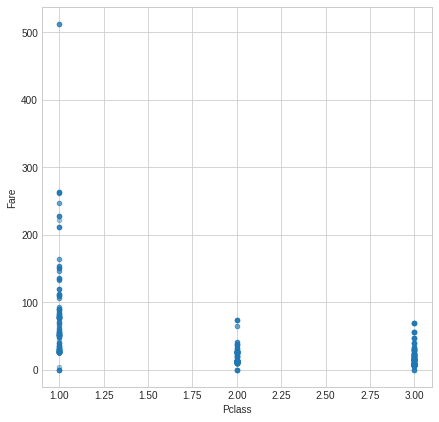

In [ ]:
#Fare and Pclass have a inverse relationship, i.e. as fare increases Passenger class decreases, and vice versa. 
#This is the relationship with the highest coefficient correlation in our correlation matrix above.
_ = titanic.plot.scatter(x='Pclass', y='Fare', cmap='RdBu', alpha=.4, figsize=(7,7))

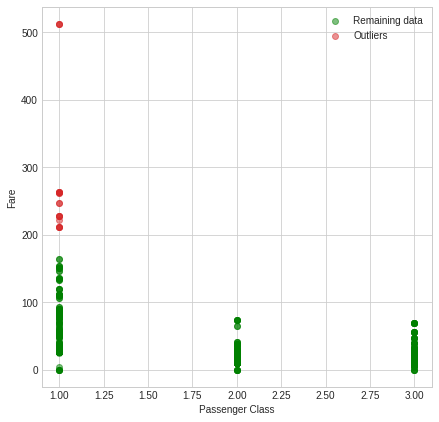

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# As we are just using these two features in our regression model, we only consider the z-score for them.
df_lr = titanic[['Pclass', 'Fare']].copy()

# Compute the z-score
non_outlier_mask = (np.abs(stats.zscore(df_lr)) < 3).all(axis=1) 
#.all(axis=1) means that we only return True when all the columnwise computed z-score are within (-3, 3), for one data point

# Removing Outliers
df_lr_filtered = df_lr.loc[non_outlier_mask] 
outliers = df_lr.loc[~non_outlier_mask]

#### Plotting ####
plt.figure(figsize=(7,7))

plt.scatter(df_lr_filtered['Pclass'], df_lr_filtered['Fare'], color='green', alpha=.5)
plt.scatter(outliers['Pclass'], outliers['Fare'], color='tab:red', alpha=.5)

plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.legend(['Remaining data', 'Outliers'])

plt.show()

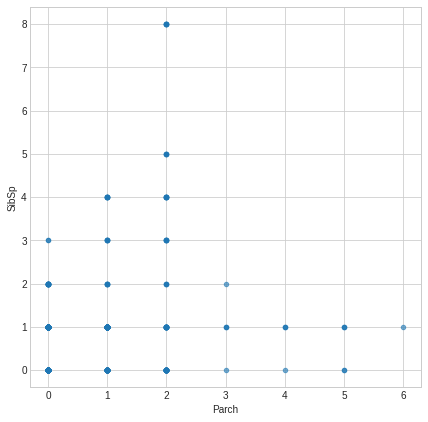

In [ ]:
#Parch and SibSp have a positive relationship, i.e. as the number of parents and children increase, number of siblings/spouses increase. 
#This is the relationship with the second highest coefficient correlation in our correlation matrix above.
_ = titanic.plot.scatter(x='Parch', y='SibSp', cmap='RdBu', alpha=.6, figsize=(7,7))

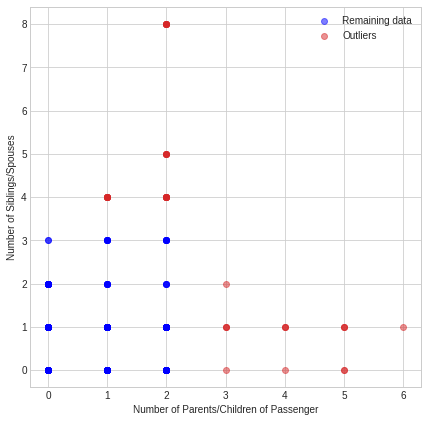

In [ ]:
# As we are just using these two features in our regression model, we only consider the z-score for them.
df_lr2 = titanic[['Parch', 'SibSp']].copy()

# Compute the z-score
non_outlier_mask = (np.abs(stats.zscore(df_lr2)) < 3).all(axis=1) 
#.all(axis=1) means that we only return True when all the columnwise computed z-score are within (-3, 3), for one data point

# Removing Outliers
df_lr_filtered2 = df_lr2.loc[non_outlier_mask] 
outliers = df_lr2.loc[~non_outlier_mask]

#### Plotting ####
plt.figure(figsize=(7,7))

plt.scatter(df_lr_filtered2['Parch'], df_lr_filtered2['SibSp'], color='blue', alpha=.5)
plt.scatter(outliers['Parch'], outliers['SibSp'], color='tab:red', alpha=.5)

plt.xlabel("Number of Parents/Children of Passenger")
plt.ylabel("Number of Siblings/Spouses")
plt.legend(['Remaining data', 'Outliers'])

plt.show()

In [ ]:
#df_lr_filtered[['Parch', 'SibSp']] = df_lr_filtered2

### Data Visualization

Text(0.5, 1.0, 'Survived Ratio with Passenger Class')

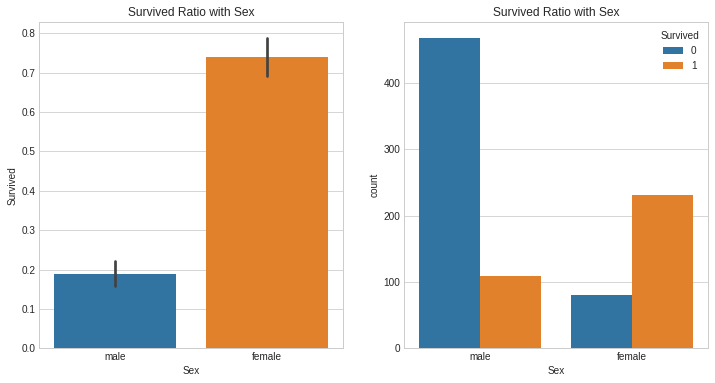

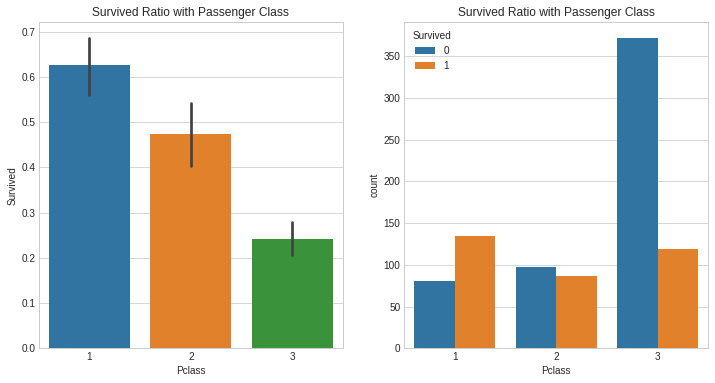

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x='Sex', y='Survived', data=titanic, ax=ax[0])
ax[0].set_title('Survived Ratio with Sex')
sns.countplot(x='Sex', hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Survived Ratio with Sex')

fig2, ax2 = plt.subplots(1,2, figsize=(12,6))
sns.barplot(x='Pclass', y='Survived', data=titanic, ax=ax2[0])
ax2[0].set_title('Survived Ratio with Passenger Class')
sns.countplot(x='Pclass', hue='Survived', data=titanic, ax=ax2[1])
ax2[1].set_title('Survived Ratio with Passenger Class')

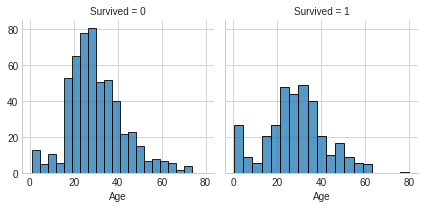

In [ ]:
age_hist = sns.FacetGrid(titanic, col='Survived')
age_hist = age_hist.map(sns.histplot, "Age")

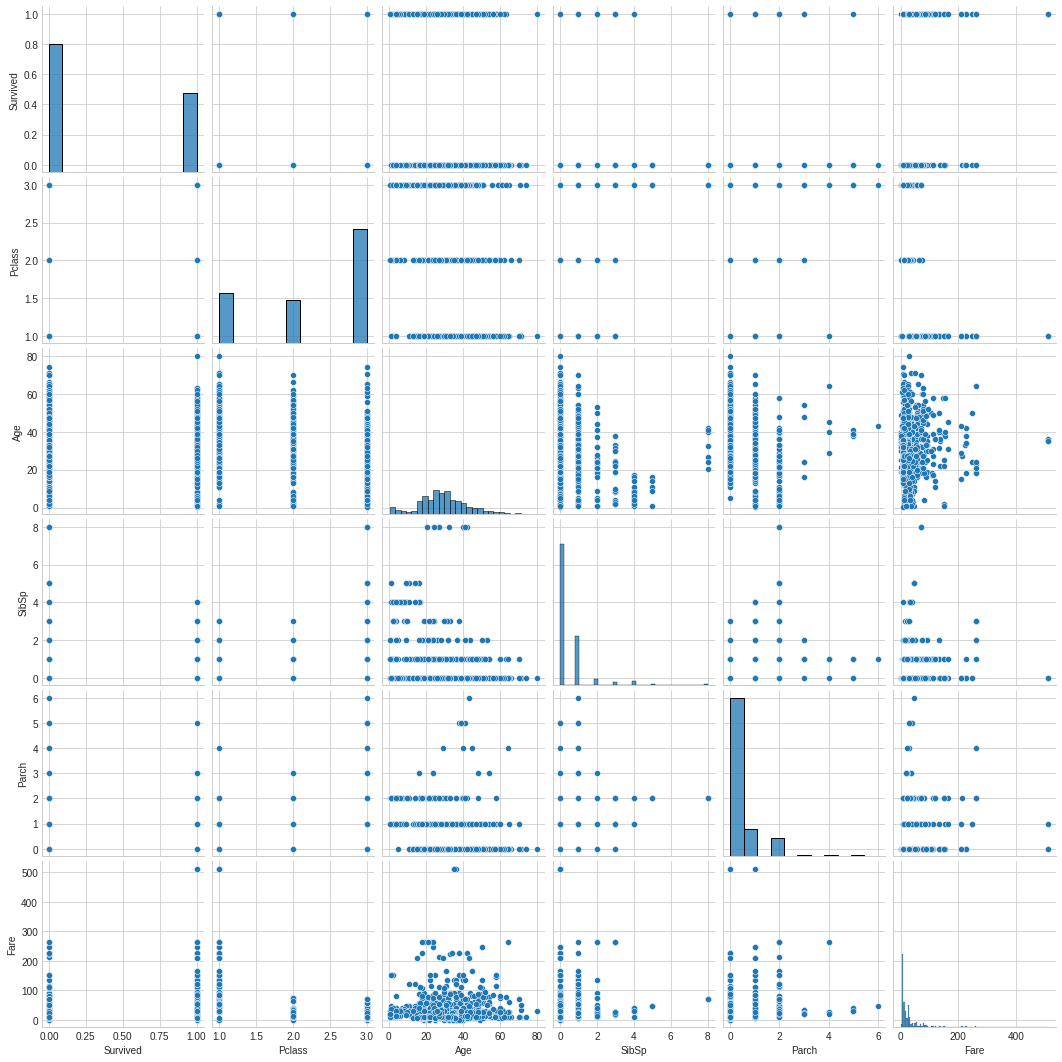

In [ ]:
import seaborn as sns
_ = sns.pairplot(titanic)

### Standardization Scaling and One-Hot Encoding

In [92]:
from sklearn.preprocessing import MinMaxScaler

#X = titanic.drop('Survived', axis = 1)
#y = titanic['Survived']

# one-hot encode Embarked and Sex variables
titanic_encoded = pd.get_dummies(titanic, columns = ['Embarked', 'Sex'])
test_data_encoded = pd.get_dummies(test_data, columns = ['Embarked', 'Sex'])
#scale data
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(titanic_encoded)
titanic_clean = titanic_encoded
titanic_clean.loc[:,:] = scaled_values
titanic_clean.head()

'''scaled_test_values = scaler.fit_transform(test_data_encoded)
test_clean = test_data_encoded
test_clean.loc[:,:] = scaled_test_values
test_clean.head()'''

#scaled_test = pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)


#partition the dataset
print("This is a partition of the titanic dataset into X and y:")
X = titanic_clean.drop('Survived', axis = 1)
y = titanic_clean['Survived']

print(X)
print(y)

This is a partition of the titanic dataset into X and y:
     Pclass       Age  SibSp  ...  Embarked_S  Sex_female  Sex_male
0       1.0  0.271174  0.125  ...         1.0         0.0       1.0
1       0.0  0.472229  0.125  ...         0.0         1.0       0.0
2       1.0  0.321438  0.000  ...         1.0         1.0       0.0
3       0.0  0.434531  0.125  ...         1.0         1.0       0.0
4       1.0  0.434531  0.000  ...         1.0         0.0       1.0
..      ...       ...    ...  ...         ...         ...       ...
884     0.5  0.334004  0.000  ...         1.0         0.0       1.0
885     0.0  0.233476  0.000  ...         1.0         1.0       0.0
886     1.0  0.336517  0.125  ...         1.0         1.0       0.0
887     0.0  0.321438  0.000  ...         0.0         0.0       1.0
888     1.0  0.396833  0.000  ...         0.0         0.0       1.0

[889 rows x 10 columns]
0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
884    0.0
885    1.0
886    0.0
887

### Logistic Regression: Split Dataset and Train Model

Accuracy:  0.8016877637130801
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       126
         1.0       0.67      0.67      0.67        52

    accuracy                           0.81       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.81      0.81      0.81       178

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)>
Confusion Matrix: 
 [[109  17]
 [ 17  35]]


'prediction = lor.predict(test_clean)\n\ntest_clean[\'Survival_Predictions\'] = pd.Series(prediction)\ntest_survival.shape\ntest_clean.shape\ncorrect_predictions = (test_clean.Survival_Predictions == test_survival.Survived).sum()\nprint("There are ", correct_predictions, "correct predictions out of ", test_survival.shape[0], "or ", correct_predictions*100/test_survival.shape[0], "%")\n'

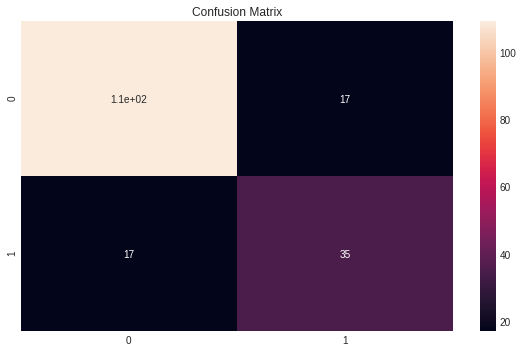

In [78]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
lor = LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg').fit(x_train, y_train)
y_pred = lor.predict(x_test)

print("Accuracy: ", lor.score(x_train, y_train))
print("Classification Report: \n", classification_report(y_pred, y_test))
print(lor.score)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

'''prediction = lor.predict(test_clean)

test_clean['Survival_Predictions'] = pd.Series(prediction)
test_survival.shape
test_clean.shape
correct_predictions = (test_clean.Survival_Predictions == test_survival.Survived).sum()
print("There are ", correct_predictions, "correct predictions out of ", test_survival.shape[0], "or ", correct_predictions*100/test_survival.shape[0], "%")
'''

So there is around a 20% misclassification rate in the testing data of our train.csv.

### K-Nearest Neighbors Classificiation

Accuracy:  0.8255977496483825
Confusion Matrix: 
 [[119   7]
 [ 23  29]]
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       126
         1.0       0.77      0.58      0.66        52

    accuracy                           0.83       178
   macro avg       0.81      0.75      0.77       178
weighted avg       0.82      0.83      0.82       178



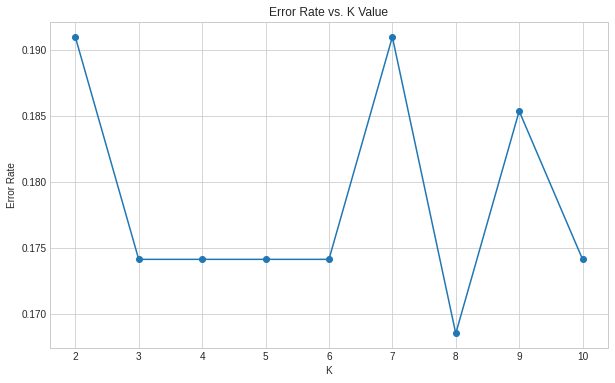

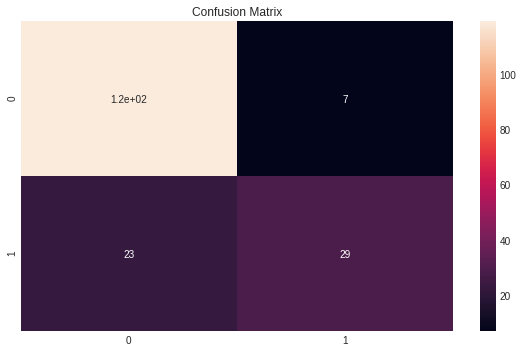

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

error_rate = []
clusters = range(2,11)

for k in clusters:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(clusters,error_rate,marker="o")
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

# k = 8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
preds = knn.predict(x_test)
conf_matrix = confusion_matrix(y_test,preds)

print("Accuracy: ", knn.score(x_train, y_train))
print("Confusion Matrix: \n", conf_matrix)
print(classification_report(y_test,pred))
'''
prediction = knn.predict(test_clean)

test_clean'Survival_Predictions'] = pd.Series(prediction)
test_survival.shape
test_clean.shape
print("For the new test data:")
correct_predictions = (test_clean.Survival_Predictions == test_survival.Survived).sum()
print("There are ", correct_predictions, "correct predictions out of ", test_survival.shape[0], "or ", correct_predictions*100/test_survival.shape[0], "%")
from sklearn.metrics import accuracy_score
accur=accuracy_score(test_survival.Survived,test_clean.Survival_Predictions)
print(accur)'''

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()




So there is around a 17% misclassification rate in the testing data of our train.csv.

### Neural Network: Split Dataset and Train Model

---



Accuracy:  0.8073136427566807
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       136
         1.0       0.58      0.71      0.64        42

    accuracy                           0.81       178
   macro avg       0.74      0.78      0.75       178
weighted avg       0.83      0.81      0.82       178

Confusion Matrix: 
 [[114  12]
 [ 22  30]]


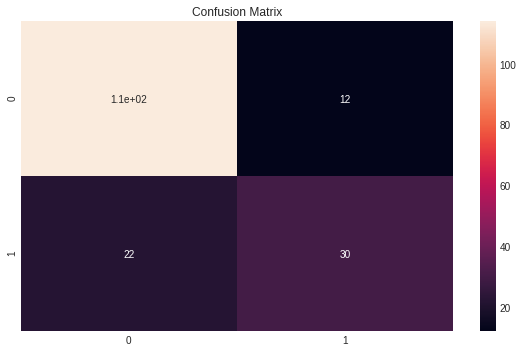

In [82]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
clf = MLPClassifier(hidden_layer_sizes=(9,6),activation="logistic",solver = 'sgd', max_iter = 300, random_state=1, learning_rate_init = 0.08)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test) 

print("Accuracy: ", clf.score(x_train, y_train))
print("Classification Report: \n", classification_report(y_pred, y_test))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)


'''prediction = clf.predict(test_clean)

test_clean['Survival_Predictions'] = pd.Series(prediction)
test_survival.shape
test_clean.shape
print("For the new testing data")
correct_predictions = (test_clean.Survival_Predictions == test_survival.Survived).sum()
print("There are ", correct_predictions, "correct predictions out of ", test_survival.shape[0], "or ", correct_predictions*100/test_survival.shape[0], "%")
'''

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [83]:
print("Accuracy: ", clf.score(X, y))


Accuracy:  0.8076490438695163


So there is around a 19% misclassification rate in the testing data of our train.csv.

### Random Forest: Split Dataset and Train Model
Source: https://medium.com/analytics-vidhya/random-forest-on-titanic-dataset-88327a014b4d

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

(711, 10) (178, 10)
(711,) (178,)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.8539325842696629
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.90       126
         1.0       0.77      0.71      0.74        52

    accuracy                           0.85       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.85      0.85      0.85       178

Confusion Matrix: 
 [[115  11]
 [ 15  37]]


'prediction = clf.predict(test_clean)\n\ntest_clean[\'Survival_Predictions\'] = pd.Series(prediction)\n#test_survival.shape\n#test_clean.shape\nprint("For the new testing data")\ncorrect_predictions = (test_clean.Survival_Predictions == test_survival.Survived).sum()\nprint("There are ", correct_predictions, "correct predictions out of ", test_survival.shape[0], "or ", correct_predictions/test_survival.shape[0], "%")\n'

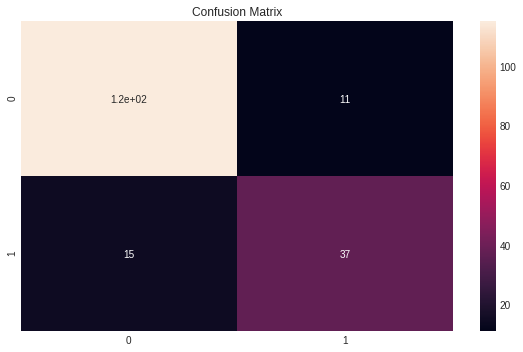

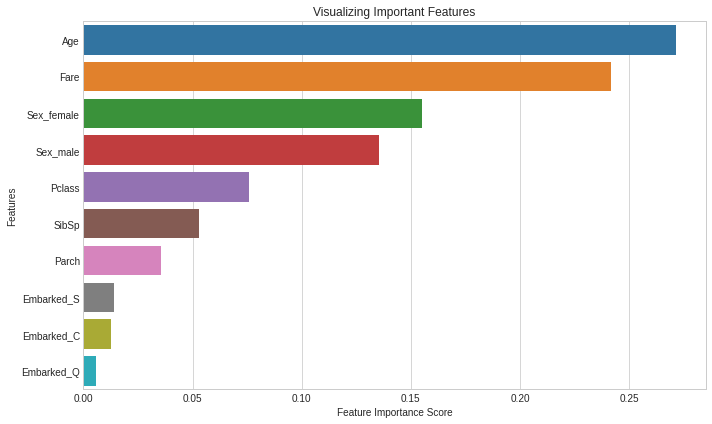

In [86]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
y_pred=clf.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Report: \n", classification_report(y_test,y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()


plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

'''prediction = clf.predict(test_clean)

test_clean['Survival_Predictions'] = pd.Series(prediction)
#test_survival.shape
#test_clean.shape
print("For the new testing data")
correct_predictions = (test_clean.Survival_Predictions == test_survival.Survived).sum()
print("There are ", correct_predictions, "correct predictions out of ", test_survival.shape[0], "or ", correct_predictions/test_survival.shape[0], "%")
'''

So the misclassification rate is around 15% in the testing data of our train.csv.

Next, we check that to see if we drop some variables then it might be better accuracy. The accuracy is ~83% compared to the previous model which includes the variables, which has accuracy of ~85%, so we do not drop the variables. 

   Accuracy: 0.8258426966292135
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       126
         1.0       0.72      0.65      0.69        52

    accuracy                           0.83       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.82      0.83      0.82       178

Confusion Matrix: 
 [[113  13]
 [ 18  34]]


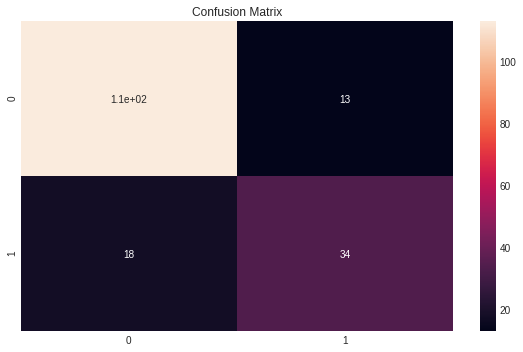

In [87]:
# Removing less important features
new_train = X.drop(['Parch','Embarked_S','Embarked_C','Embarked_Q'], axis=1)
#new_test = test_clean.drop(['Parch','Embarked_S','Embarked_C','Embarked_Q'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=21)
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print("Classification Report: \n", classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

So around a 21% misclassification error rate in the testing data of our train.csv, compared to a 15% with the variables not dropped. So we will include the variables.

### SVM with Linear Kernel: Split Dataset and Train Model

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       423
         1.0       0.77      0.69      0.73       288

    accuracy                           0.79       711
   macro avg       0.78      0.77      0.78       711
weighted avg       0.79      0.79      0.79       711

Confusion Matrix: 
 [[106  20]
 [ 20  32]]
   Accuracy: 0.7752808988764045


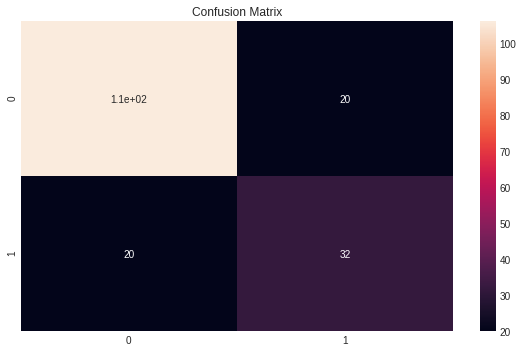

In [91]:
from sklearn import preprocessing
from sklearn.svm import SVC, LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
#scaler = preprocessing.StandardScaler()
#scaler.fit(X_train)

clf = SVC(kernel='linear', C = 10, gamma =1)
clf.fit(X_train, (y_train))

print(classification_report(y_train, clf.predict((X_train))))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)
y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
#prediction = clf.predict(test_clean)


'''test_clean['Survival_Predictions'] = pd.Series(prediction)
#test_survival.shape
#test_clean.shape
print("For the new testing data")
correct_predictions = (test_clean.Survival_Predictions == test_survival.Survived).sum()
print("There are ", correct_predictions, "correct predictions out of ", test_survival.shape[0], "or ", correct_predictions*100/test_survival.shape[0], "%")
'''


plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

So there is about a 23% misclassification error rate in the testing data of our train.csv.

### SVM with rbf Kernel: Split Dataset and Train Model

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       423
         1.0       0.83      0.73      0.78       288

    accuracy                           0.83       711
   macro avg       0.83      0.82      0.82       711
weighted avg       0.83      0.83      0.83       711

Confusion Matrix: 
 [[106  20]
 [ 20  32]]
   Accuracy: 0.8202247191011236


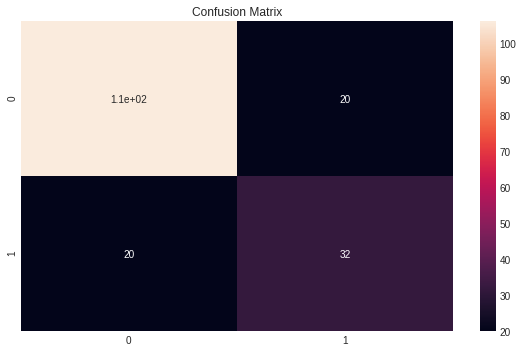

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

#scaler = preprocessing.StandardScaler()
#scaler.fit(X_train)

clf2 = SVC(kernel='rbf', C = 10, gamma  = 1)
clf2.fit((X_train), y_train)

print(classification_report(y_train, clf2.predict((X_train))))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)
y_pred = clf2.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

'''prediction = clf2.predict(test_clean)

test_clean['Survival_Predictions'] = pd.Series(prediction)
#test_survival.shape
#test_clean.shape
print("For the new testing data")
correct_predictions = (test_clean.Survival_Predictions == test_survival.Survived).sum()
print("There are ", correct_predictions, "correct predictions out of ", test_survival.shape[0], "or ", correct_predictions*100/test_survival.shape[0], "%")

'''

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

So there is around a 18% misclassification error rate in the testing data of our train.csv.

### Hyperparameter Tuning: Grid Search


Logistic model grid search

In [ ]:
#Source: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.800153 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.798289 (0.040336) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.798289 (0.040336) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.798664 (0.039752) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.797915 (0.040392) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.797915 (0.040392) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.797919 (0.041711) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.797919 (0.045757) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.797919 (0.045757) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796046 (0.045587) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.787062 (0.041495) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.787436 (0.041842) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787057 (0.041002) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.800153 (0.045290) wi

KNN Grid search

In [ ]:
#Source: https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(2,11))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print("Best: %f using %s" % (best_model.best_score_, best_model.best_params_))

Best leaf_size: 2
Best p: 2
Best n_neighbors: 10
Best: 0.810968 using {'leaf_size': 2, 'n_neighbors': 10, 'p': 2}


NN Grid search

In [ ]:
#Define NN parameters
max_iter = [50 * n for n in range(6,10)]
learning_rate_init = [0.01 * n for n in range(7,20)]
hidden_layer_sizes = [(3*a, 3*b) for a in range(1, 4) for b in range(1, 4) ]
parameter_space = {
    'max_iter' : max_iter,
    'learning_rate_init' : learning_rate_init,
    'hidden_layer_sizes' : hidden_layer_sizes
}

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
#define grid search
def grid_search(clf, parameters, X, y):
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

unknown_model = MLPClassifier(activation="logistic",solver = 'sgd', random_state=1)

#perform grid search
clf, params, score = grid_search(unknown_model, parameter_space, X, y)

#present tuned parameters
print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'hidden_layer_sizes': (9, 6), 'learning_rate_init': 0.08, 'max_iter': 300}
Best score :
 0.8132863581540024


Linear SVM Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X, y)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.803, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.803, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.787, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.753, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.785, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.803, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.803, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.803, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.787, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.753, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.785, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.803, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.803, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   55.2s finished


rbf SVM Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X, y)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.809, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.781, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.808, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.753, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.785, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.7s finished


##ROC Curve

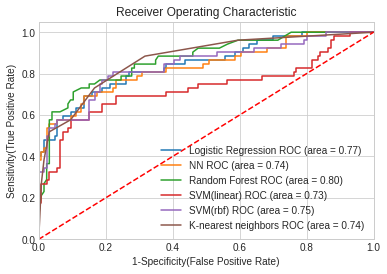

In [94]:
#Tabib- "Source: https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python" 

from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg'),
},
{
    'label': 'NN',
    'model': MLPClassifier(hidden_layer_sizes=(6,9),activation="logistic",solver = 'sgd', max_iter = 500, random_state=1, learning_rate_init = 0.08),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
},
{
  'label': 'SVM(linear)',
  'model': SVC(kernel='linear', probability=True) #added in probability=True
}
,
{
  'label': 'SVM(rbf)',
  'model': SVC(kernel='rbf', probability=True) #added in probability=True.  
},
 {
  'label': 'K-nearest neighbors',
  'model': KNeighborsClassifier(n_neighbors=7) 
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Obtain the accuracy and MSE during each iteration of the cross validation(NN model)

In [95]:
## Source: TA's hw1 solution
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score


##NN model:
mlp = MLPClassifier(hidden_layer_sizes=(9,6),activation="logistic",solver = 'sgd', max_iter = 300, random_state=1, learning_rate_init = 0.08)

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

i = 0
for train_indices, test_indices in kf.split(X):
    #print(train_indices)
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    mlp.fit(X[start_train:stop_train], y[start_train:stop_train])
    pred = mlp.predict(X[start_test:stop_test])
    #pred
    i+=1
    print("Accuracy for batch ", i, " : ", accuracy_score(y[start_test:stop_test], pred))
    print("Mean Square Error for batch ", i, " : ", mean_squared_error(y[start_test:stop_test], pred))
    

Accuracy for batch  1  :  0.797752808988764
Mean Square Error for batch  1  :  0.20224719101123595
Accuracy for batch  2  :  0.8539325842696629
Mean Square Error for batch  2  :  0.14606741573033707
Accuracy for batch  3  :  0.7865168539325843
Mean Square Error for batch  3  :  0.21348314606741572
Accuracy for batch  4  :  0.8202247191011236
Mean Square Error for batch  4  :  0.1797752808988764
Accuracy for batch  5  :  0.8089887640449438
Mean Square Error for batch  5  :  0.19101123595505617
Accuracy for batch  6  :  0.8202247191011236
Mean Square Error for batch  6  :  0.1797752808988764
Accuracy for batch  7  :  0.797752808988764
Mean Square Error for batch  7  :  0.20224719101123595
Accuracy for batch  8  :  0.797752808988764
Mean Square Error for batch  8  :  0.20224719101123595
Accuracy for batch  9  :  0.8651685393258427
Mean Square Error for batch  9  :  0.1348314606741573
Accuracy for batch  10  :  0.7954545454545454
Mean Square Error for batch  10  :  0.20454545454545456


Find the average of MSE and Accuracy(NN model)


In [96]:
## Source: TA's hw1 solution
from sklearn.model_selection import cross_validate

CV = cross_validate(mlp, X, y, cv=10, scoring=['accuracy', 'neg_mean_squared_error'])
print(CV['test_accuracy'])
print(-1*CV['test_neg_mean_squared_error'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))
print('Average MSE = ', sum(-1 * CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.79775281 0.82022472 0.76404494 0.84269663 0.82022472 0.78651685
 0.83146067 0.7752809  0.84269663 0.61363636]
[0.20224719 0.17977528 0.23595506 0.15730337 0.17977528 0.21348315
 0.16853933 0.2247191  0.15730337 0.38636364]
Average Accuracy =  0.7894535240040857
Average MSE =  0.2105464759959142
